# Ejercicio

Implementar los algoritmos de `VarianceThreshold`, `sklearn.feature_selection.f_regression`, y `sklearn.feature_selection.mutual_info_regression` al siguiente dataset para la selección de atributos.

Para el siguiente ejemplo utilizaremos un dataset de valores de propiedades (`housing_data.csv`). El mismo originalmente cuenta con 81 columnas. Para el proposito del ejercicio se le brinda el dataset con solo los atributos númericos. 

Luego de realizar el proceso de selección de atributos comparar los resultados y explicar el resultado asociado a cada método.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_regression, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

In [78]:
housing_df=pd.read_csv('housing_data.csv', sep=';')
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [79]:
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

## VarianceThreshold

In [80]:
housing_df=pd.read_csv('housing_data.csv', sep=';')
housing_df=housing_df.fillna(housing_df.mean())
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [81]:
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [82]:
th = 0.4
sel = VarianceThreshold(th)
print(sel.fit_transform(X_train))
print(sel.fit_transform(X_train).shape)
print(X_train.shape)

[[6.50000000e+01 6.00000000e+01 7.00499584e+01 ... 0.00000000e+00
  2.00000000e+00 2.00900000e+03]
 [6.83000000e+02 1.20000000e+02 7.00499584e+01 ... 0.00000000e+00
  1.10000000e+01 2.00800000e+03]
 [9.61000000e+02 2.00000000e+01 5.00000000e+01 ... 0.00000000e+00
  2.00000000e+00 2.01000000e+03]
 ...
 [1.21700000e+03 9.00000000e+01 6.80000000e+01 ... 0.00000000e+00
  4.00000000e+00 2.01000000e+03]
 [5.60000000e+02 1.20000000e+02 7.00499584e+01 ... 0.00000000e+00
  1.00000000e+01 2.00600000e+03]
 [6.85000000e+02 6.00000000e+01 5.80000000e+01 ... 0.00000000e+00
  6.00000000e+00 2.01000000e+03]]
(1022, 32)
(1022, 37)


## F_test

In [83]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X_train, y_train) # Llamamos al estadístico F
print(f_test)
print(f_test.shape)

[5.09113760e-01 6.73682615e+00 1.28915979e+02 7.33363614e+01
 1.62857050e+03 1.38505790e+00 3.65097556e+02 3.62663803e+02
 3.06290592e+02 1.93160129e+02 2.64166379e-01 4.33623731e+01
 6.54341155e+02 6.05576313e+02 1.28758896e+02 4.21311432e-02
 1.13187965e+03 5.98878339e+01 3.74697166e-01 4.97954582e+02
 8.65303218e+01 3.89632778e+01 1.92381821e+01 4.31845019e+02
 2.93787921e+02 2.78202068e+02 7.58024880e+02 7.27175552e+02
 1.02368716e+02 1.09493897e+02 1.42760011e+01 3.52022335e+00
 9.59825179e+00 1.22112072e+00 7.33481415e-01 2.11044803e+00
 2.78001568e+00]
(37,)


In [84]:
f_test = pd.Series(f_test)
f_test /= np.max(f_test)
f_test.index = X_train.columns
f_test.sort_values(ascending=False)

OverallQual      1.000000
GrLivArea        0.695014
GarageCars       0.465454
GarageArea       0.446512
TotalBsmtSF      0.401789
1stFlrSF         0.371845
FullBath         0.305762
TotRmsAbvGrd     0.265168
YearBuilt        0.224183
YearRemodAdd     0.222688
MasVnrArea       0.188073
Fireplaces       0.180396
GarageYrBlt      0.170826
BsmtFinSF1       0.118607
LotFrontage      0.079159
2ndFlrSF         0.079063
OpenPorchSF      0.067233
WoodDeckSF       0.062858
HalfBath         0.053133
LotArea          0.045031
BsmtFullBath     0.036773
BsmtUnfSF        0.026626
BedroomAbvGr     0.023925
KitchenAbvGr     0.011813
EnclosedPorch    0.008766
ScreenPorch      0.005894
MSSubClass       0.004137
3SsnPorch        0.002162
YrSold           0.001707
MoSold           0.001296
OverallCond      0.000850
PoolArea         0.000750
MiscVal          0.000450
Id               0.000313
BsmtHalfBath     0.000230
BsmtFinSF2       0.000162
LowQualFinSF     0.000026
dtype: float64

<Axes: >

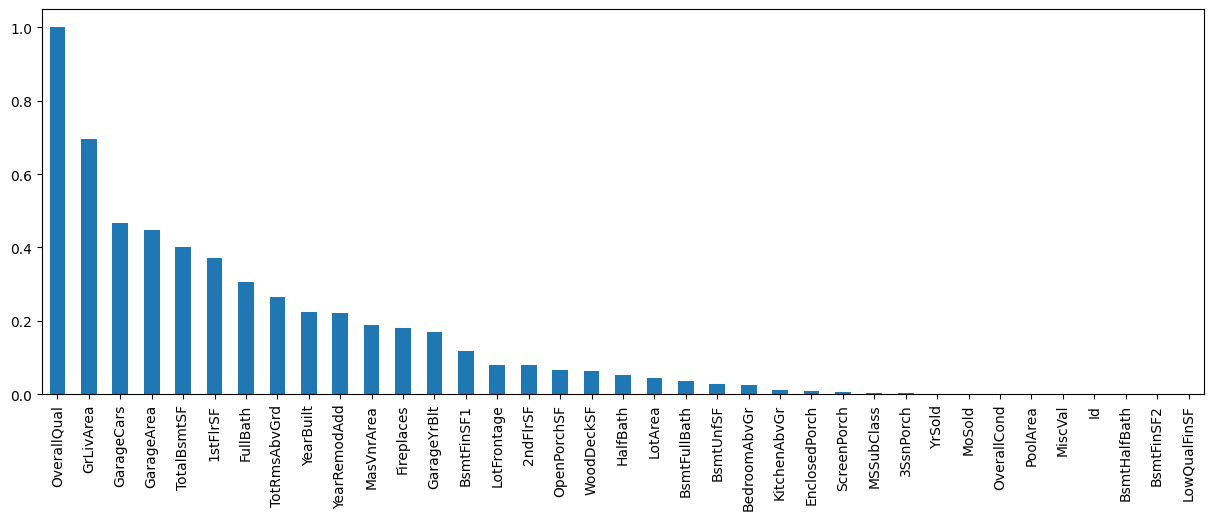

In [85]:
f_test.sort_values(ascending=False).plot.bar(figsize=(15,5))

## Mutual Information Regression

In [86]:
mutual_info = mutual_info_regression(X_train, y_train)
print(mutual_info)
print(mutual_info.shape)

[0.         0.25356835 0.20950441 0.16700045 0.52103889 0.09692882
 0.33771439 0.25236939 0.10151958 0.15895629 0.00419022 0.11107131
 0.38284424 0.30937087 0.22792229 0.         0.48196193 0.02403277
 0.00808405 0.26257541 0.07036666 0.04487346 0.00622116 0.18838453
 0.17439648 0.26315837 0.37029789 0.36644591 0.0734058  0.17383945
 0.00785015 0.00725197 0.01277679 0.00121786 0.         0.
 0.        ]
(37,)


In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.521039
GrLivArea        0.481962
TotalBsmtSF      0.382844
GarageCars       0.370298
GarageArea       0.366446
YearBuilt        0.337714
1stFlrSF         0.309371
GarageYrBlt      0.263158
FullBath         0.262575
MSSubClass       0.253568
YearRemodAdd     0.252369
2ndFlrSF         0.227922
LotFrontage      0.209504
TotRmsAbvGrd     0.188385
Fireplaces       0.174396
OpenPorchSF      0.173839
LotArea          0.167000
BsmtFinSF1       0.158956
BsmtUnfSF        0.111071
MasVnrArea       0.101520
OverallCond      0.096929
WoodDeckSF       0.073406
HalfBath         0.070367
BedroomAbvGr     0.044873
BsmtFullBath     0.024033
ScreenPorch      0.012777
BsmtHalfBath     0.008084
EnclosedPorch    0.007850
3SsnPorch        0.007252
KitchenAbvGr     0.006221
BsmtFinSF2       0.004190
PoolArea         0.001218
MiscVal          0.000000
MoSold           0.000000
Id               0.000000
LowQualFinSF     0.000000
YrSold           0.000000
dtype: float64

<Axes: >

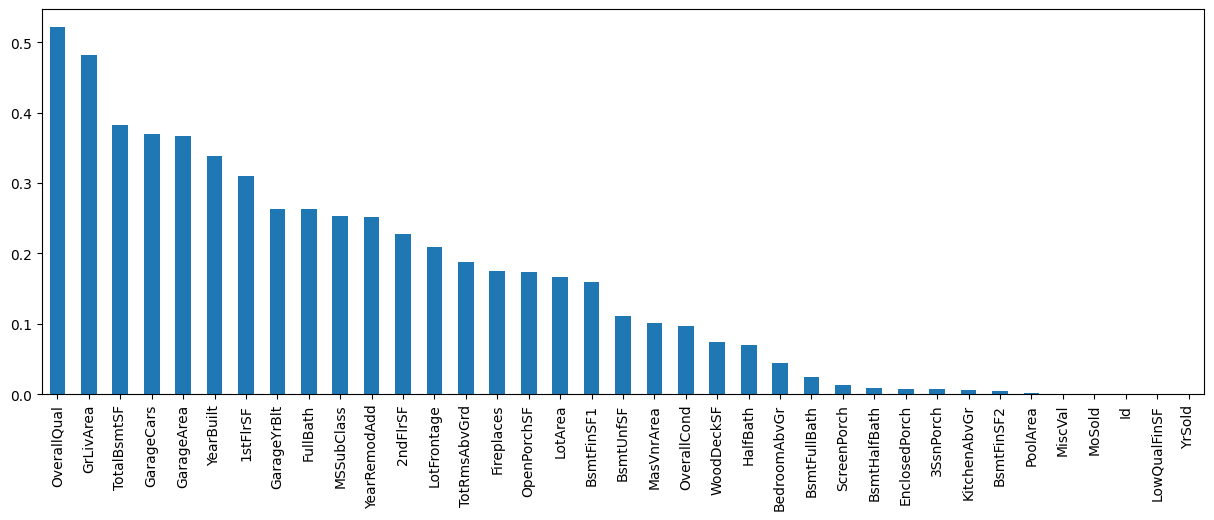

In [88]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

Del gráfico, podemos inferir que `OverallQual` tiene la mayor ganancia de información mutua (`0,52`), luego `GrLivArea`(`0,48`) seguido de `TotalBsmtSF`(`0,39`), y así sucesivamente. Entonces, `OverallQual` proporciona el `50%` de la información sobre el precio de venta variable objetivo en este caso.